In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=fb9bd85589b4da12c62ab342c6a49a6045ea0c0992756fd46da3225b41bf2661
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Tạo một SparkSession với tên ứng dụng là "Final_Assignment"
spark = SparkSession.builder.appName("Final_Assignment").getOrCreate()

In [ ]:
from google.colab import drive

# Gắn kết Google Drive vào hệ thống tập tin của Colab
drive.mount('/content/drive')

# Đọc tập tin CSV từ Google Drive vào Spark DataFrame
data = spark.read.csv('/content/drive/My Drive/Data_Analytics/assignment/final_assignment_dataset1.csv', inferSchema = True, header = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Hiển thị  DataFrame 'data'
data.show()

+--------------------+--------------------+-------+-------+--------+-------+--------+----------+--------------------+----+-----+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance| income|siblings|classmates|               class| GPA|grade|
+--------------------+--------------------+-------+-------+--------+-------+--------+----------+--------------------+----+-----+
|nIZItzTE51ICiNWTY...|wAjeEqVLJ4YeeiTD8...|  6.475|   5.18|     9.8|      0|       1|         3|Df6vMzWMYbH0Vg8EC...|5.83|    C|
|/0qDyLsby0lkUOu8o...|v/9chF2NL7r/yyuLY...|    2.9|   2.26|    14.0|5000000|       1|         4|4O1ttzh847N5tdD6c...|2.58|    F|
|1TzzPuyN19RRDrPJj...|HqYtIDi/unvdPu9r7...|    7.4|    6.2|     4.1|1950000|       1|         4|Yu2qPlj+Fq5y0TVl8...| 6.8|    C|
|M9E+E81PJraI2ZfF9...|xZpjxEvALlVnxOQGA...|   8.43|   7.99|    10.0|      0|       1|        15|FXfQIOTImLxDRvVRI...|8.21|    B|
|44Q9XSIK6T2zxehiR...|/EFzofvz7X/XLm4+K...|   7.35|   5.67|     7.4|      0|       3|         5|s

In [ ]:
# In ra cấu trúc của DataFrame 'data'
data.printSchema()

root
 |-- student_id: string (nullable = true)
 |-- fullname: string (nullable = true)
 |-- 1st_GPA: double (nullable = true)
 |-- 2nd_GPA: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- income: integer (nullable = true)
 |-- siblings: integer (nullable = true)
 |-- classmates: integer (nullable = true)
 |-- class: string (nullable = true)
 |-- GPA: double (nullable = true)
 |-- grade: string (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType, FloatType, DoubleType
from pyspark.sql.functions import col, cast

# Chuyển đổi kiểu dữ liệu của các cột trong DataFrame 'data'
# Chuyển đổi cột '1st_GPA' sang kiểu Float
# Chuyển đổi cột '2nd_GPA' sang kiểu Float
# Chuyển đổi cột 'income' sang kiểu Double
# Chuyển đổi cột 'classmates' sang kiểu Integer
data = data.withColumn("1st_GPA", col("1st_GPA").cast(FloatType()))\
    .withColumn("2nd_GPA", col("2nd_GPA").cast(FloatType()))\
    .withColumn("income", col("income").cast(DoubleType()))\
    .withColumn("classmates", col("classmates").cast(IntegerType()))

In [ ]:
# In ra cấu trúc của DataFrame 'data' sau khi đã chuyển đổi kiểu dữ liệu
data.printSchema()

root
 |-- student_id: string (nullable = true)
 |-- fullname: string (nullable = true)
 |-- 1st_GPA: float (nullable = true)
 |-- 2nd_GPA: float (nullable = true)
 |-- distance: double (nullable = true)
 |-- income: double (nullable = true)
 |-- siblings: integer (nullable = true)
 |-- classmates: integer (nullable = true)
 |-- class: string (nullable = true)
 |-- GPA: double (nullable = true)
 |-- grade: string (nullable = true)



In [ ]:
# Điền giá trị 0 vào các ô trống (NA) trong DataFrame 'data'
data = data.na.fill(0)

# Hiển thị 30 dòng đầu tiên của DataFrame 'data'
data.show(30)

+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance|   income|siblings|classmates|               class| GPA|grade|
+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|nIZItzTE51ICiNWTY...|wAjeEqVLJ4YeeiTD8...|  6.475|   5.18|     9.8|      0.0|       1|         3|Df6vMzWMYbH0Vg8EC...|5.83|    C|
|/0qDyLsby0lkUOu8o...|v/9chF2NL7r/yyuLY...|    2.9|   2.26|    14.0|5000000.0|       1|         4|4O1ttzh847N5tdD6c...|2.58|    F|
|1TzzPuyN19RRDrPJj...|HqYtIDi/unvdPu9r7...|    7.4|    6.2|     4.1|1950000.0|       1|         4|Yu2qPlj+Fq5y0TVl8...| 6.8|    C|
|M9E+E81PJraI2ZfF9...|xZpjxEvALlVnxOQGA...|   8.43|   7.99|    10.0|      0.0|       1|        15|FXfQIOTImLxDRvVRI...|8.21|    B|
|44Q9XSIK6T2zxehiR...|/EFzofvz7X/XLm4+K...|   7.35|   5.67|     7.4|      0.0|     

In [ ]:
from pyspark.sql.functions import expr, col, round

# Thêm cột 'GPA' vào DataFrame 'data' bằng cách tính trung bình cộng của '1st_GPA' và '2nd_GPA', và làm tròn đến 2 chữ số thập phân
gpa_df = data.withColumn("GPA", round((col("1st_GPA")+col("2nd_GPA"))/2,2))

# Thêm cột 'grade' vào DataFrame 'gpa_df' để phân loại điểm trung bình (GPA)
# Nếu GPA lớn hơn hoặc bằng 8.5 thì gán 'A'
# Nếu GPA từ 7 đến dưới 8.5 thì gán 'B'
# Nếu GPA từ 5.5 đến dưới 7 thì gán 'C'
# Nếu GPA từ 4 đến dưới 5.5 thì gán 'D'
# Nếu GPA nhỏ hơn 4 thì gán 'F'
grade_df = gpa_df.withColumn("grade", expr("CASE WHEN GPA >= 8.5 THEN 'A' \
                                                WHEN GPA < 8.5 AND GPA >=7 THEN 'B' \
                                                WHEN GPA >= 5.5 AND GPA <7 THEN 'C' \
                                                WHEN GPA >=4 AND GPA < 5.5 THEN 'D' \
                                                ELSE 'F' END"))

# Hiển thị 20 dòng đầu tiên của DataFrame 'grade_df'
grade_df.show(20)

+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance|   income|siblings|classmates|               class| GPA|grade|
+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|nIZItzTE51ICiNWTY...|wAjeEqVLJ4YeeiTD8...|  6.475|   5.18|     9.8|      0.0|       1|         3|Df6vMzWMYbH0Vg8EC...|5.83|    C|
|/0qDyLsby0lkUOu8o...|v/9chF2NL7r/yyuLY...|    2.9|   2.26|    14.0|5000000.0|       1|         4|4O1ttzh847N5tdD6c...|2.58|    F|
|1TzzPuyN19RRDrPJj...|HqYtIDi/unvdPu9r7...|    7.4|    6.2|     4.1|1950000.0|       1|         4|Yu2qPlj+Fq5y0TVl8...| 6.8|    C|
|M9E+E81PJraI2ZfF9...|xZpjxEvALlVnxOQGA...|   8.43|   7.99|    10.0|      0.0|       1|        15|FXfQIOTImLxDRvVRI...|8.21|    B|
|44Q9XSIK6T2zxehiR...|/EFzofvz7X/XLm4+K...|   7.35|   5.67|     7.4|      0.0|     

In [ ]:
from pyspark.sql.functions import col

# Sắp xếp DataFrame theo cột "grade"
grade_df = grade_df.orderBy(col("grade"))


# Hiển thị 30 dòng đầu tiên của DataFrame 'data'
grade_df.show(32)

+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance|   income|siblings|classmates|               class| GPA|grade|
+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|M9E+E81PJraI2ZfF9...|xZpjxEvALlVnxOQGA...|   8.43|   7.99|    10.0|      0.0|       1|        15|FXfQIOTImLxDRvVRI...|8.21|    B|
|R6PaDJwL945oIfwjU...|Y40CVUVbK0qeN8Otg...|   7.81|   7.62|    11.0|3000000.0|       0|         2|TgVS/7rvOjCx2e1si...|7.72|    B|
|C9T2VYC4yiWieKqdn...|tulUGzDNNOBcBdjyZ...|   8.35|   7.12|     7.8|2000000.0|       2|         5|QtawYOQ4R9v5Irrvy...|7.74|    B|
|UVYxIjJYE3nMAtKDk...|LSxDJo6MwhotJOOVe...|   7.54|    6.8|     1.6|1500000.0|       1|        10|QHo72ol8KIcvBkRcR...|7.17|    B|
|hBgpuI3l5Ei1/ZryE...|j5vwxQkUWK76+tEiJ...|  7.605|  7.185|    16.0|1000000.0|     

In [ ]:
from pyspark.sql.functions import col, desc

# Sắp xếp DataFrame theo cột "classmates"
grade_classmates = grade_df.orderBy(col("classmates").desc())

# Hiển thị 30 hàng đầu tiên
grade_classmates.show(30)


+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance|   income|siblings|classmates|               class| GPA|grade|
+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|2gwmtlCw4Ai3/+cx9...|g2ltxHqcbRl8+5MTs...|    7.1|    5.9|     4.0|5000000.0|       2|        32|aeJH+EijFTORKRLro...| 6.5|    C|
|VGn5pwvmPbxG8sxMX...|6z9mqf0KQWsxvHsrB...|    8.3|    7.7|    10.0|5000000.0|       2|        20|jSxH7+MKAcwkHeD7/...| 8.0|    B|
|M9E+E81PJraI2ZfF9...|xZpjxEvALlVnxOQGA...|   8.43|   7.99|    10.0|      0.0|       1|        15|FXfQIOTImLxDRvVRI...|8.21|    B|
|UVYxIjJYE3nMAtKDk...|LSxDJo6MwhotJOOVe...|   7.54|    6.8|     1.6|1500000.0|       1|        10|QHo72ol8KIcvBkRcR...|7.17|    B|
|yUsklGq+Lf82ypPaD...|bnv20lrewAhQHQNrV...|    6.2|    5.8|    20.0|4000000.0|     

In [ ]:
from pyspark.sql.functions import asc, col

# Sắp xếp DataFrame theo cột "siblings"
grade_siblings = grade_df.orderBy(col("siblings").asc())

# Hiển thị 30 hàng đầu tiên
grade_siblings.show(30)


+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance|   income|siblings|classmates|               class| GPA|grade|
+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|R6PaDJwL945oIfwjU...|Y40CVUVbK0qeN8Otg...|   7.81|   7.62|    11.0|3000000.0|       0|         2|TgVS/7rvOjCx2e1si...|7.72|    B|
|WvMSpp78a00HqN+nI...|eZ5W1s3TmCRmRDjIF...|    8.0|    7.5|    19.0|2300000.0|       0|         4|j3pgKhr+jsi5Eeu9W...|7.75|    B|
|nIZItzTE51ICiNWTY...|wAjeEqVLJ4YeeiTD8...|  6.475|   5.18|     9.8|      0.0|       1|         3|Df6vMzWMYbH0Vg8EC...|5.83|    C|
|/0qDyLsby0lkUOu8o...|v/9chF2NL7r/yyuLY...|    2.9|   2.26|    14.0|5000000.0|       1|         4|4O1ttzh847N5tdD6c...|2.58|    F|
|1TzzPuyN19RRDrPJj...|HqYtIDi/unvdPu9r7...|    7.4|    6.2|     4.1|1950000.0|     

In [ ]:
from pyspark.sql.functions import desc, col

# Sắp xếp DataFrame theo cột "GPA"
grade_gpa = grade_df.orderBy(col("GPA").desc())

# Hiển thị 30 hàng đầu tiên
grade_gpa.show(30)


+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance|   income|siblings|classmates|               class| GPA|grade|
+--------------------+--------------------+-------+-------+--------+---------+--------+----------+--------------------+----+-----+
|M9E+E81PJraI2ZfF9...|xZpjxEvALlVnxOQGA...|   8.43|   7.99|    10.0|      0.0|       1|        15|FXfQIOTImLxDRvVRI...|8.21|    B|
|3ZGppTiHRMsjuUas/...|N9sW1fStIHb29oMaB...|   8.44|   7.79|    14.0|2000000.0|       2|        10|VTy7aPoluYJf/P0tA...|8.11|    B|
|VGn5pwvmPbxG8sxMX...|6z9mqf0KQWsxvHsrB...|    8.3|    7.7|    10.0|5000000.0|       2|        20|jSxH7+MKAcwkHeD7/...| 8.0|    B|
|WvMSpp78a00HqN+nI...|eZ5W1s3TmCRmRDjIF...|    8.0|    7.5|    19.0|2300000.0|       0|         4|j3pgKhr+jsi5Eeu9W...|7.75|    B|
|C9T2VYC4yiWieKqdn...|tulUGzDNNOBcBdjyZ...|   8.35|   7.12|     7.8|2000000.0|     

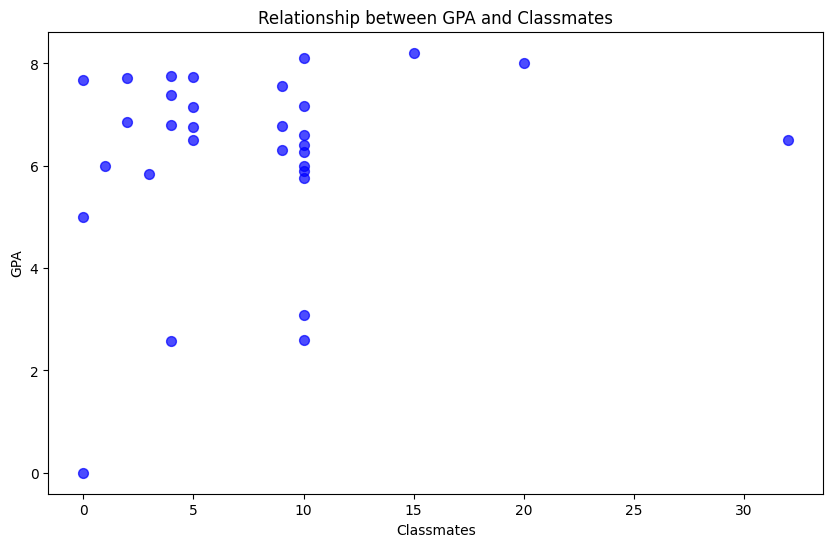

In [ ]:
import matplotlib.pyplot as plt

# Trích xuất dữ liệu từ DataFrame PySpark và chuyển đổi thành mảng dữ liệu thường
classmates = grade_df.select('classmates').rdd.flatMap(lambda x: x).collect()
gpa = grade_df.select('GPA').rdd.flatMap(lambda x: x).collect()

# Tạo biểu đồ scatter plot sử dụng Matplotlib cho số bạn bè
plt.figure(figsize=(10, 6))
plt.scatter(classmates, gpa, s=50, c='blue', alpha=0.7)

# Đặt tiêu đề và nhãn trục
plt.title('Relationship between GPA and Classmates')
plt.xlabel('Classmates')
plt.ylabel('GPA')

# Hiển thị biểu đồ
plt.show()


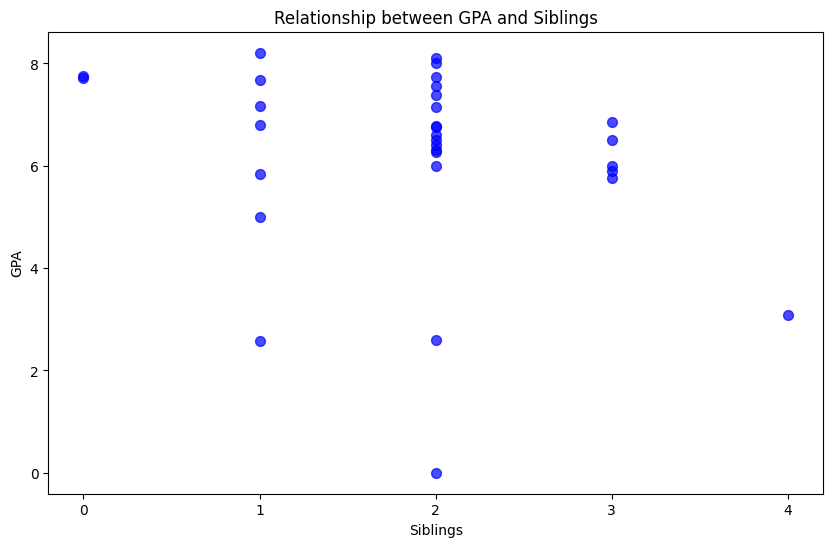

In [ ]:
import matplotlib.pyplot as plt

# Trích xuất dữ liệu từ DataFrame PySpark và chuyển đổi thành mảng dữ liệu thường
siblings = grade_df.select('siblings').rdd.flatMap(lambda x: x).collect()
gpa = grade_df.select('GPA').rdd.flatMap(lambda x: x).collect()

# Tạo biểu đồ scatter plot sử dụng Matplotlib cho số anh/chị/em
plt.figure(figsize=(10, 6))
plt.scatter(siblings, gpa, s=50, c='blue', alpha=0.7)

# Đặt tiêu đề và nhãn trục
plt.title('Relationship between GPA and Siblings')
plt.xlabel('Siblings')
plt.ylabel('GPA')

# Chỉ định các vị trí của các số nguyên trên trục hoành
plt.xticks(range(int(min(siblings)), int(max(siblings)) + 1))

# Hiển thị biểu đồ
plt.show()



In [ ]:
from pyspark.sql.functions import expr

# Thêm cột 'classmates_group' vào DataFrame 'grade_df' để phân loại số lượng bạn học
# Nếu số lượng bạn học nhỏ hơn 5 thì gán '<5'
# Nếu số lượng bạn học từ 5 đến 10 thì gán '5-10'
# Nếu số lượng bạn học từ 11 đến 15 thì gán '10-15'
# Nếu số lượng bạn học từ 16 đến 20 thì gán '15-20'
# Nếu số lượng bạn học lớn hơn 20 thì gán '>20'
classmates_groups = grade_df.withColumn("classmates_group",
                                       expr("CASE WHEN classmates < 5 THEN '<5' \
                                                 WHEN classmates >= 5 AND classmates <= 10 THEN '5-10' \
                                                 WHEN classmates > 10 AND classmates <= 15 THEN '10-15' \
                                                 WHEN classmates > 15 AND classmates <= 20 THEN '15-20' \
                                                 ELSE '>20' END"))

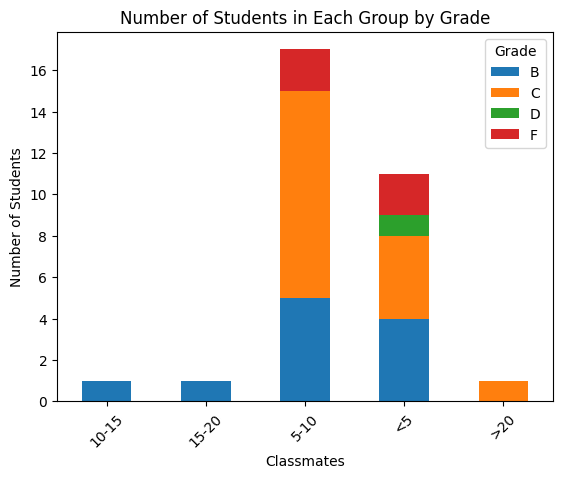

In [ ]:
pdf = classmates_groups.select('classmates_group', 'grade').toPandas()

# Nhóm dữ liệu theo classmate và grade
grouped_pdf = pdf.groupby(['classmates_group', 'grade']).size().unstack().fillna(0)

# Tạo biểu đồ cột xếp chồng
grouped_pdf.plot(kind='bar', stacked=True)

# Thiết lập nhãn trục và tiêu đề
plt.xlabel('Classmates')
plt.ylabel('Number of Students')
plt.title('Number of Students in Each Group by Grade')
plt.xticks(rotation = 45)

# Thêm chú giải
plt.legend(title='Grade')

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Thêm cột 'siblings_group' vào DataFrame 'grade_siblings' để phân loại số lượng anh chị em
# Nếu không có anh chị em thì gán 'only child'
# Nếu có 1 anh chị em thì gán '1 sibling'
# Nếu có 2 anh chị em thì gán '2 siblings'
# Nếu có từ 3 đến dưới 20 anh chị em thì gán '> 3 siblings'
siblings_groups = grade_siblings.withColumn("siblings_group",
                                            expr("CASE WHEN siblings == 0 THEN 'only child' \
                                                      WHEN siblings == 1  THEN '1 siblings' \
                                                      WHEN siblings == 2 THEN '2 siblings' \
                                                      WHEN siblings >= 3 AND siblings < 20 THEN '> 3 siblings ' END"))

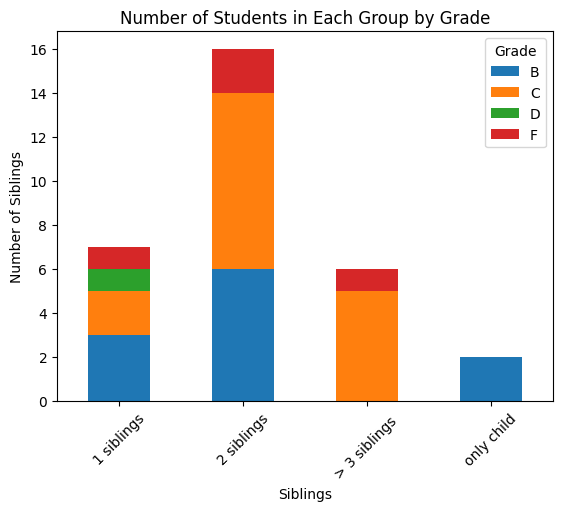

In [ ]:
pdf = siblings_groups.select('siblings_group', 'grade').toPandas()

# Nhóm dữ liệu theo siblings and grade
grouped_pdf = pdf.groupby(['siblings_group', 'grade']).size().unstack().fillna(0)

# Tạo biểu đồ cột xếp chồng
grouped_pdf.plot(kind='bar', stacked=True)

# Thiết lập nhãn trục và tiêu đề
plt.xlabel('Siblings')
plt.ylabel('Number of Siblings')
plt.title('Number of Students in Each Group by Grade')
plt.xticks(rotation = 45)

# Thêm chú giải
plt.legend(title='Grade')

# Hiển thị biểu đồ
plt.show()